In [5]:
import os
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

# Visualization
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [6]:
crop = pd.read_csv("../data/Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
corr=crop.drop(['label'],axis=1).corr() 
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.240418,-0.145105,0.022692,0.194955,0.115461,0.065274
P,-0.240418,1.000000,0.746740,-0.145323,-0.120915,-0.162067,-0.067347
K,-0.145105,0.746740,1.000000,-0.183932,0.193081,-0.197693,-0.055218
temperature,0.022692,-0.145323,-0.183932,1.000000,0.230838,-0.037770,-0.039627
humidity,0.194955,-0.120915,0.193081,0.230838,1.000000,-0.014288,0.097664
ph,0.115461,-0.162067,-0.197693,-0.037770,-0.014288,1.000000,-0.140630
rainfall,0.065274,-0.067347,-0.055218,-0.039627,0.097664,-0.140630,1.000000


<Axes: >

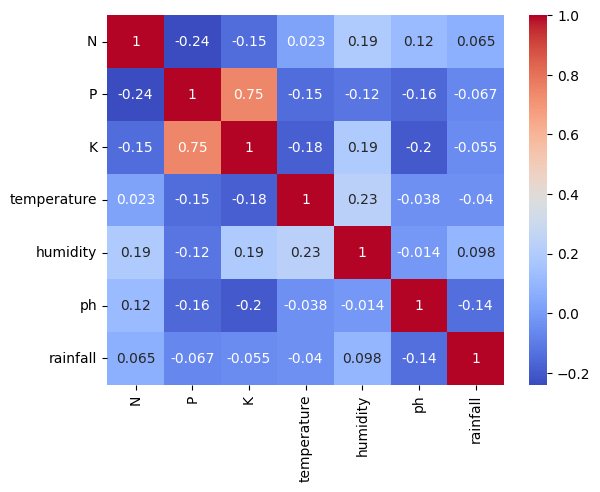

In [8]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

In [9]:
crop['label'].value_counts()

label
mango          228
kidneybeans    228
pigeonpeas     228
papaya         228
lentil         228
grapes         228
watermelon     227
jute           227
cotton         227
coconut        227
orange         227
apple          227
muskmelon      227
rice           227
maize          227
banana         227
pomegranate    227
blackgram      227
mungbean       227
mothbeans      227
chickpea       227
coffee         227
Name: count, dtype: int64

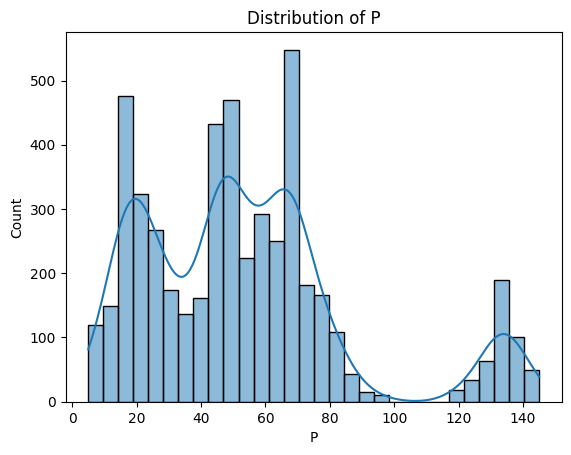

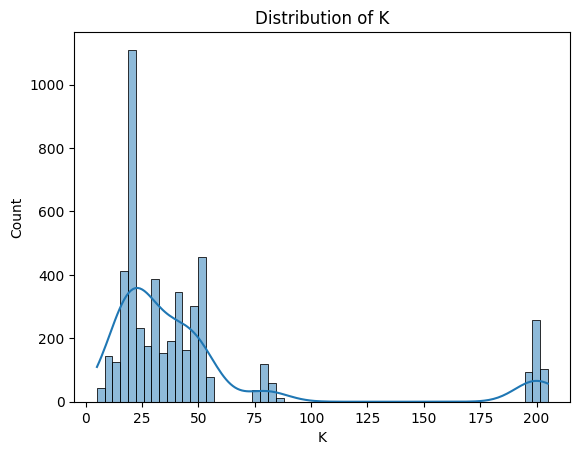

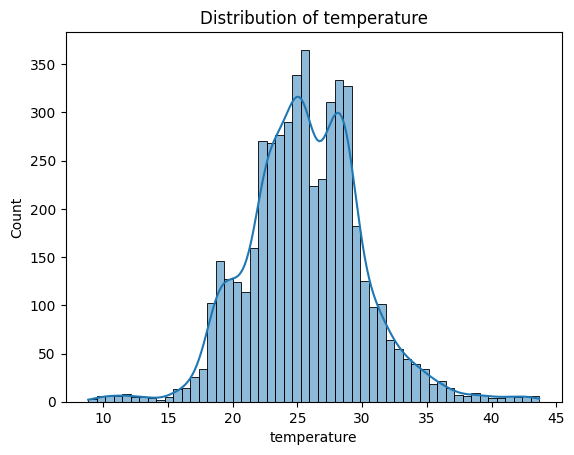

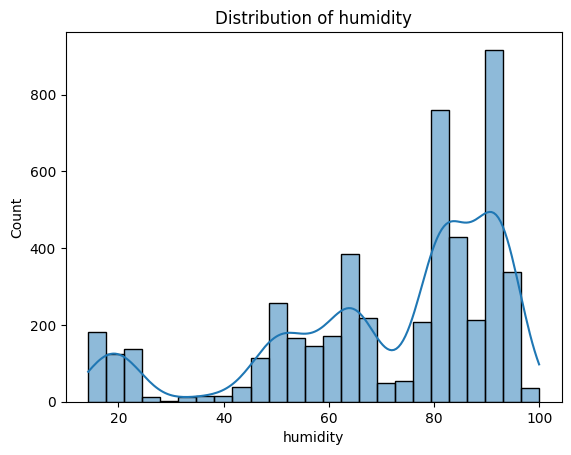

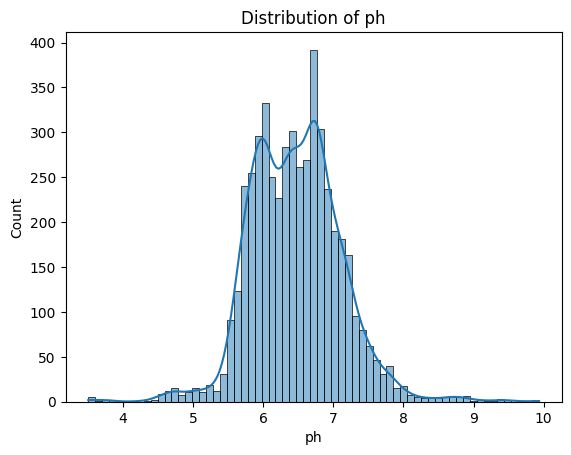

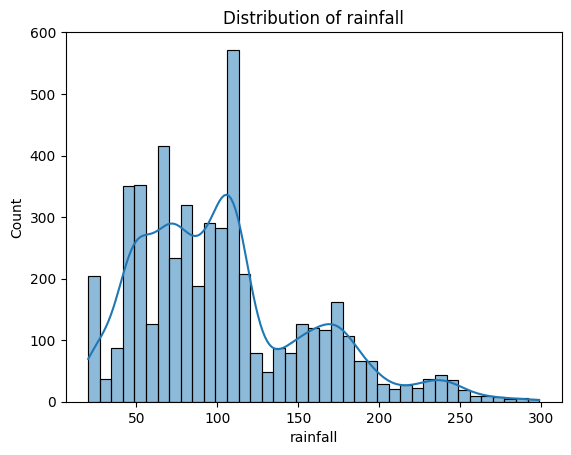

In [10]:
# Distribution of 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' features
features = ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    sns.histplot(crop[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [11]:
crop_dict = { 
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=crop['label'].map(crop_dict)

In [12]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,1
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,1
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice,1
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice,1
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,1


In [13]:
crop=crop.drop('label',axis=1)

In [14]:
X=crop.drop('crop_num',axis=1) 
Y=crop['crop_num']

In [15]:
X.head() 

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


In [16]:
Y.head() 

0    1
1    1
2    1
3    1
4    1
Name: crop_num, dtype: int64

In [17]:
X.shape

(5000, 7)

In [18]:
Y.shape

(5000,)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [20]:
X_train.shape

(4500, 7)

In [21]:
X_test.shape

(500, 7)

In [22]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
3716,90.567320,46.377147,20.980477,23.844625,59.663970,5.940352,104.008622
3779,24.227812,30.163959,31.568696,31.312760,50.787742,5.459341,95.135073
135,98.000000,44.000000,21.000000,25.771751,74.089114,6.524478,107.493192
4480,49.312297,46.750988,50.972279,34.219096,91.152796,6.729105,129.344149
1437,120.000000,8.000000,46.000000,29.556575,90.709373,6.732834,28.365356
...,...,...,...,...,...,...,...
4426,48.700461,57.555717,49.679205,32.652518,92.000000,6.790510,127.685611
466,29.000000,78.000000,25.000000,19.959917,59.331578,5.982855,195.787103
3092,28.981478,135.399438,199.274229,22.402659,82.515718,6.047514,69.374838
3772,20.872357,25.154022,29.489349,30.845796,49.459968,5.832560,95.123285


In [23]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()


ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [24]:
X_train

array([[0.64690943, 0.29555105, 0.07990239, ..., 0.52959321, 0.37876687,
        0.30122283],
       [0.1730558 , 0.17974256, 0.13284348, ..., 0.42603034, 0.30396362,
        0.26932546],
       [0.7       , 0.27857143, 0.08      , ..., 0.69789772, 0.46960603,
        0.31374867],
       ...,
       [0.20701056, 0.93142456, 0.97137115, ..., 0.79621463, 0.39543198,
        0.17672622],
       [0.14908826, 0.1439573 , 0.12244674, ..., 0.41053861, 0.3620039 ,
        0.26928308],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11933471]], shape=(4500, 7))

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [26]:
X_train

array([[ 1.11330152, -0.21791279, -0.53624981, ..., -0.53657067,
        -0.81957253,  0.01538048],
       [-0.7293581 , -0.71528702, -0.32708669, ..., -0.93798331,
        -1.56771518, -0.15248151],
       [ 1.31975315, -0.29083685, -0.53586415, ...,  0.11578243,
         0.08895276,  0.08129852],
       ...,
       [-0.59731931,  2.51303656,  2.98582313, ...,  0.49686158,
        -0.65289694, -0.63979099],
       [-0.82255991, -0.86897757, -0.36816279, ..., -0.99802968,
        -0.987227  , -0.1527045 ],
       [-0.51347623,  0.75218593, -0.51610982, ..., -0.41484731,
         0.83950502, -0.94181752]], shape=(4500, 7))

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(Y_test,ypred)}")

Logistic Regression  with accuracy : 0.982
Naive Bayes  with accuracy : 0.994
Support Vector Machine  with accuracy : 0.99
K-Nearest Neighbors  with accuracy : 0.982
Decision Tree  with accuracy : 0.992
Random Forest  with accuracy : 0.996
Bagging  with accuracy : 0.994
AdaBoost  with accuracy : 0.302
Gradient Boosting  with accuracy : 0.996
Extra Trees  with accuracy : 0.954


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB

# Instantiate the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, Y_train)

# Predict the labels of the test set
y_pred = nb_classifier.predict(X_test)


In [29]:
# Calculate evaluation metrics
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
accuracy = accuracy_score(Y_test, y_pred)

# Display evaluation metrics
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.9944022988505746
Recall: 0.994
F1-score: 0.9940108495877374
Accuracy: 0.994


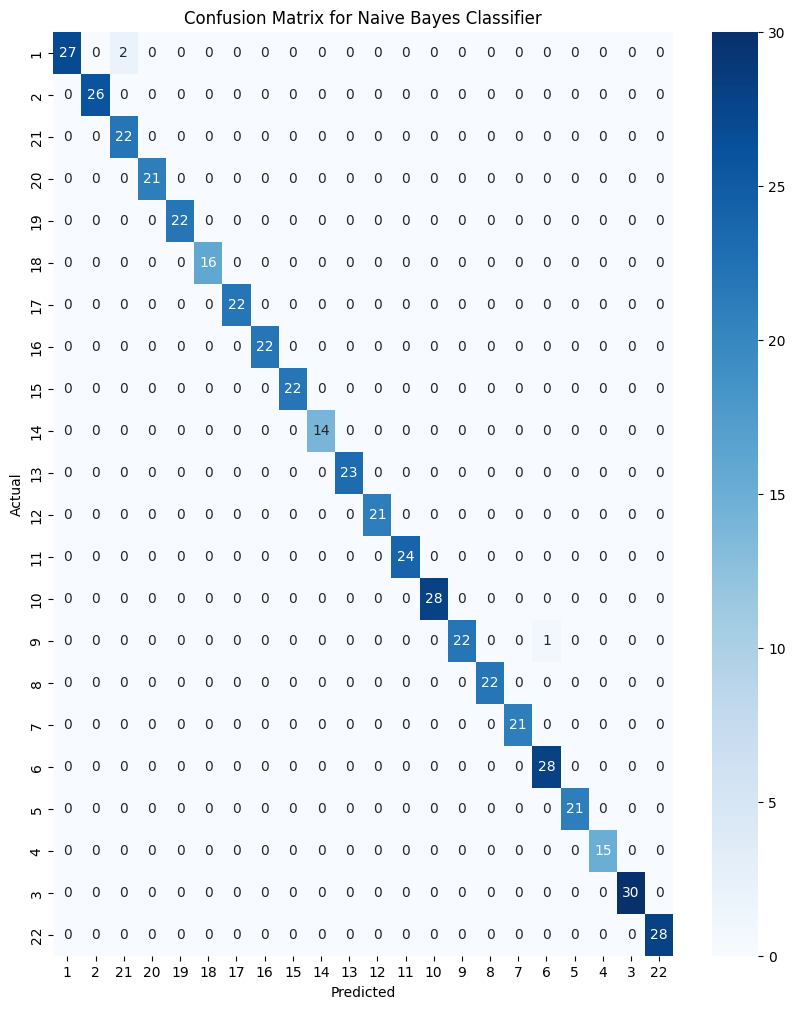

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=crop['crop_num'].unique(), 
            yticklabels=crop['crop_num'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


In [31]:
import pickle

with open("../models/crop_recommendation_model.pkl", "wb") as f:
    pickle.dump(nb_classifier, f)